In [26]:
from pathlib import Path
import numpy as np
import pandas as pd


DATA_PATH = Path("../datasets/AB_NYC_2019.csv")

df = pd.read_csv(DATA_PATH)

In [27]:
df.shape

(48895, 16)

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [30]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
df = df.drop(["id","last_review","name","host_name"],axis=1)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [44]:
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  log_price                       

In [45]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,neigh_median
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,145.477288,7.029962,23.274466,1.090910,7.143982,112.781327,4.733364,116.679251
std,7.861097e+07,0.054530,0.046157,130.950025,20.510550,44.550582,1.597283,32.952519,131.622289,0.681265,46.599433
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,34.500000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,4.248495,80.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,4.672829,105.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,5.170484,150.000000
max,2.743213e+08,40.913060,-73.712990,1000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,6.908755,800.000000


In [49]:
# basic engineered features
# neighbourhood median price
if 'neighbourhood' in df.columns:
    neigh_med = df.groupby('neighbourhood')['price'].median().rename('neigh_median')
    df = df.merge(neigh_med, how='left', left_on='neighbourhood', right_index=True)

# convert last_review to days since
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df['days_since_last_review'] = (pd.Timestamp('today') - df['last_review']).dt.days.fillna(9999)

# features we'll use
features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
if 'neigh_median' in df.columns:
    features.append('neigh_median')
if 'days_since_last_review' in df.columns:
    features.append('days_since_last_review')
# categorical
cat_features = [c for c in ['neighbourhood_group', 'room_type'] if c in df.columns]

print('Numeric features:', features)
print('Categorical features:', cat_features)

df.columns


Numeric features: ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'neigh_median']
Categorical features: ['neighbourhood_group', 'room_type']


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'log_price',
       'neigh_median_x', 'neigh_median_y', 'neigh_median'],
      dtype='object')

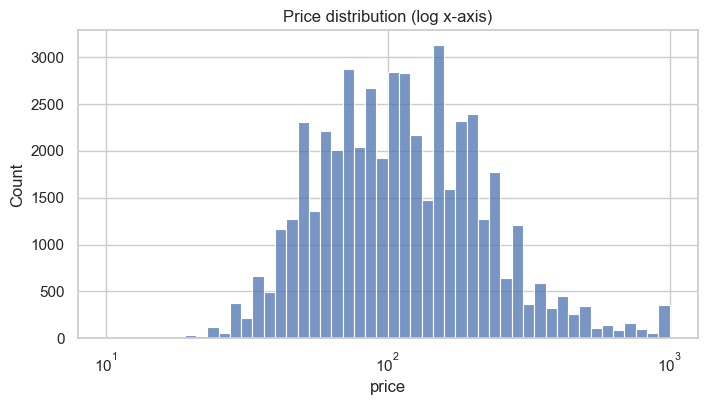

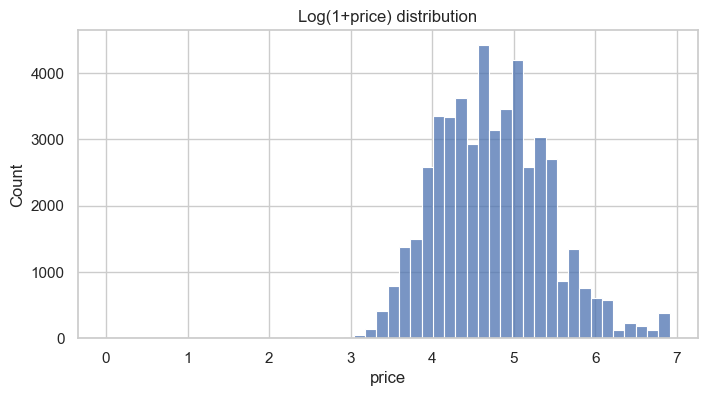

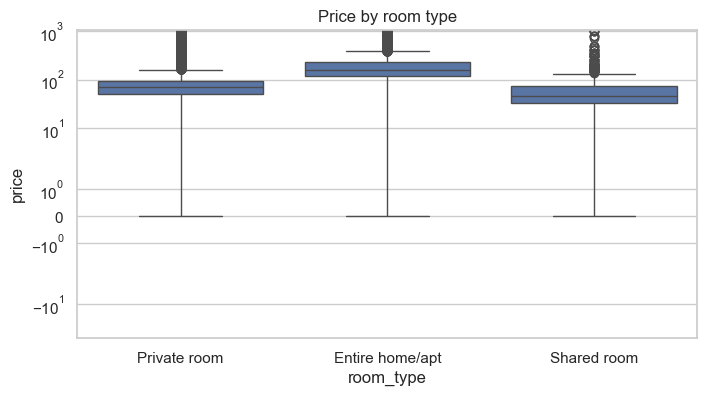

In [39]:
# EDA examples
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, log_scale=(True, False))
plt.title('Price distribution (log x-axis)')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['price']), bins=50)
plt.title('Log(1+price) distribution')
plt.show()

if 'room_type' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='room_type', y='price', data=df)
    plt.yscale('symlog')
    plt.title('Price by room type')
    plt.show()


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, features),
    ('cat', cat_transformer, cat_features)
])

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('model', rf)
])

print('Pipeline ready')

Pipeline ready


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# prepare X and y
X = df[features + cat_features].copy()
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

# baseline linear model
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('model', LinearRegression())
])

print('Training Linear Regression baseline...')
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
mae_lr = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_lr))
rmse_lr = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_lr))
r2_lr = r2_score(np.expm1(y_test), np.expm1(y_pred_lr))
print('Linear Regression - MAE:', mae_lr, 'RMSE:', rmse_lr, 'R2:', r2_lr)

# Random Forest
print('Training Random Forest...')
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
mae_rf = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_rf))
rmse_rf = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_rf))
r2_rf = r2_score(np.expm1(y_test), np.expm1(y_pred_rf))
print('Random Forest - MAE:', mae_rf, 'RMSE:', rmse_rf, 'R2:', r2_rf)


Train shape: (39116, 7) Test shape: (9779, 7)
Training Linear Regression baseline...
Linear Regression - MAE: 52.70877701469641 RMSE: 11482.01370393864 R2: 0.29634324172184634
Training Random Forest...
Random Forest - MAE: 51.14511372561911 RMSE: 10088.881070320567 R2: 0.38171913641242095


In [10]:
# GridSearch example (small grid)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10]
}

gs = GridSearchCV(pipe_rf, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
print('Running GridSearch (small grid)...')
gs.fit(X_train, y_train)
print('Best params:', gs.best_params_)
best_rf = gs.best_estimator_


Running GridSearch (small grid)...
Best params: {'model__max_depth': 10, 'model__n_estimators': 100}


{'mae': 62.622485129582635, 'rmse': 20127.107244488052, 'r2': 0.24884016880584148}


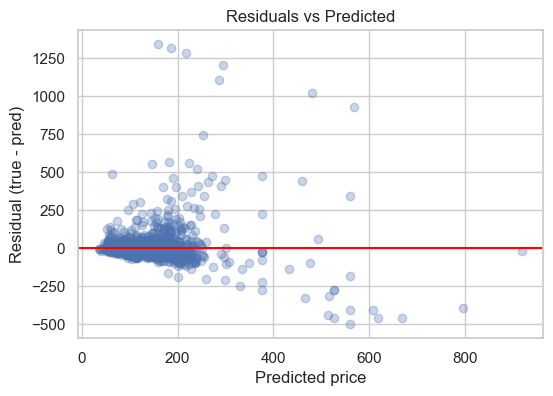

In [12]:
# Use best_rf if available, otherwise pipe_rf
final_model = globals().get('best_rf', pipe_rf)

y_pred = final_model.predict(X_test)
y_pred_price = np.expm1(y_pred)
y_true_price = np.expm1(y_test)

mae = mean_absolute_error(y_true_price, y_pred_price)
rmse = mean_squared_error(y_true_price, y_pred_price)
r2 = r2_score(y_true_price, y_pred_price)
print({'mae': mae, 'rmse': rmse, 'r2': r2})

# residual plot
plt.figure(figsize=(6,4))
plt.scatter(y_pred_price, y_true_price - y_pred_price, alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel('Predicted price')
plt.ylabel('Residual (true - pred)')
plt.title('Residuals vs Predicted')
plt.show()
